# From generated to reconstructed particles
In this exercise we will discuss the differences between "generated" and "reconstructed" particles, the latter closely reproducing the detector response after radiation-matter interaction.

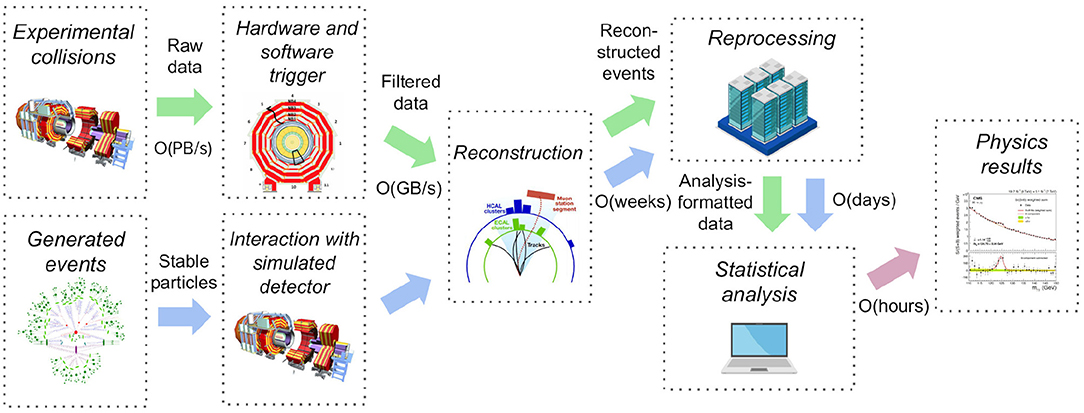
Image [credits](https://www.frontiersin.org/articles/10.3389/fdata.2021.661501/full)

## Import libraries and read input files

In [ ]:
!ls

### Download input files

In [ ]:
%%bash
mkdir -p data

In [ ]:
!wget "https://cernbox.cern.ch/remote.php/dav/public-files/Opo0T2MIuZ2p1YS/ntuple_mumuHZZ4mu_final.root" -P data -q --show-progress


In [ ]:
!ls data

### Import (or install, if you are using colab) ROOT 

In [ ]:
##### cell to be used only if you run the notebook on colab! ######
def installRoot():
  !pip install -q condacolab
  import condacolab

  condacolab.install()

  !conda config --add channels conda-forge
  !conda config --set channel_priority strict
  !conda install root_base

try:
  import ROOT
except:
  print("ROOT not installed. Installing ROOT. The notebook will be restarted once the installation succeeds.")
  installRoot()

In [ ]:
import ROOT
from ROOT import RDataFrame
from ROOT import TChain, TSelector, TTree, TH1F, TH1D, TCanvas, TFile, TEfficiency, TLegend
from ROOT import TLorentzVector
from ROOT import TVector3
from array import array
import numpy as np

### Read the input file and open the TTree

In [ ]:
file ="data/ntuple_mumuHZZ4mu_final.root"
f = TFile(file)  #open the rootfile
tree = f.Get("T") #load the tree


In [ ]:
N = tree.GetEntries()
print("total number of events=",N)

## Exercises
### Ex. 2A
Plot:
 * generated muons p_T, abs(eta), phi distributions
 * reconstructed muons p_T, abs(eta), phi distributions
 * invariant mass distribution of the Higgs boson (both generated and reconstructed)

### Ex. 2B
 * Sort muons by p_T and plot p_T distributions after sorting.
 * Sort muons by |eta| and plot the |eta| distributions after sorting.

### Ex. 2C
 * Fill the reconstruction efficiency plot. Generated and reconstructed muons are not identical, here we assume their trajectories to be compatible within some distance in the (phi; eta) plane, called deltaR.
 * Code is provided for computing efficiency vs pT. Add the efficiency plot as a function of pseudorapidity.

In [ ]:
# Define histograms (TH1F) with name and binning

hGenMu1Pt = TH1F("hGenMu1Pt","Gen Muon 1 Pt",100,0,200)
hGenMu2Pt = TH1F("hGenMu2Pt","Gen Muon 2 Pt",100,0,200)
hGenMu3Pt = TH1F("hGenMu3Pt","Gen Muon 3 Pt",100,0,200)
hGenMu4Pt = TH1F("hGenMu4Pt","Gen Muon 4 Pt",100,0,200)

In [ ]:
hRecoMu1Pt = TH1F("hRecoMu1Pt","Reco Muon 1 Pt",100,0,200)
hRecoMu2Pt = TH1F("hRecoMu2Pt","Reco Muon 2 Pt",100,0,200)
hRecoMu3Pt = TH1F("hRecoMu3Pt","Reco Muon 3 Pt",100,0,200)
hRecoMu4Pt = TH1F("hRecoMu4Pt","Reco Muon 4 Pt",100,0,200)

In [ ]:
hGenMu1Eta = TH1F("hGenMu1Eta","Gen Muon 1 Eta",100,-3.0,3.0)
hGenMu2Eta = TH1F("hGenMu2Eta","Gen Muon 2 Eta",100,-3.0,3.0)
hGenMu3Eta = TH1F("hGenMu3Eta","Gen Muon 3 Eta",100,-3.0,3.0)
hGenMu4Eta = TH1F("hGenMu4Eta","Gen Muon 4 Eta",100,-3.0,3.0)

In [ ]:
hRecoMu1Eta = TH1F("hRecoMu1Eta","Reco Muon 1 Eta",100,-3.0,3.0)
hRecoMu2Eta = TH1F("hRecoMu2Eta","Reco Muon 2 Eta",100,-3.0,3.0)
hRecoMu3Eta = TH1F("hRecoMu3Eta","Reco Muon 3 Eta",100,-3.0,3.0)
hRecoMu4Eta = TH1F("hRecoMu4Eta","Reco Muon 4 Eta",100,-3.0,3.0)

In [ ]:
hRecoMass = TH1F("hRecoMass","Higgs mass from reconstructed muons",200,110,140)
hGenMass = TH1F("hGenMass","Higgs mass from generated muons",200,110,140)

In [ ]:
histoNum_Pt = TH1F("histoNum_Pt","Gen Muon Pt after matching with reco",100,0,200)
histoDen_Pt = TH1F("histoDen_Pt","Gen Muon Pt before matching with reco",100,0,200)
hPtRes  = TH1F("hPtRes","hPtRes", 200,-0.1,0.1)

In [ ]:
histoNum_Eta = TH1F("histoNum_Eta","Gen Muon Eta after matching with reco",100,-3.0,3.0)
histoDen_Eta = TH1F("histoDen_Eta","Gen Muon Eta before matching with reco",100,-3.0,3.0)

Now start looping on events

In [ ]:
hGenMu1Pt.Reset()
hGenMu2Pt.Reset()
hGenMu3Pt.Reset()
hGenMu4Pt.Reset()
hRecoMu1Pt.Reset()
hRecoMu2Pt.Reset()
hRecoMu3Pt.Reset()
hRecoMu4Pt.Reset()
histoNum_Pt.Reset()
histoDen_Pt.Reset()

hGenMu1Eta.Reset()
hGenMu2Eta.Reset()
hGenMu3Eta.Reset()
hGenMu4Eta.Reset()
hRecoMu1Eta.Reset()
hRecoMu2Eta.Reset()
hRecoMu3Eta.Reset()
hRecoMu4Eta.Reset()
histoNum_Eta.Reset()
histoDen_Eta.Reset()

hRecoMass.Reset()
hGenMass.Reset()

#for i in range(N):  #uncomment to loop on all the events in the rootfile
nevt=10000
for i in range(nevt):
  tree.GetEntry(i)
  print("----- event", i)
  n_genpart = tree.nmcp
  print("ngenpart=",n_genpart)
  GenMuonList = []
  RecoMuonList = []
  for pdg, st, ene, px, py, pz in zip(tree.mcpdg, tree.mcgst, tree.mcene, tree.mcmox, tree.mcmoy, tree.mcmoz):
    if(abs(pdg)==13 and st==1):  #only stable muons produced after muon beam scattering
     #print("sim mu energy=", ene)
     genMuonVector = TLorentzVector()  #create a TLorentzVector
     genMuonVector.SetPxPyPzE(px,py,pz,ene) #fill it with stable muons 4-momentum coordinates
     print("gen mu pt=", genMuonVector.Pt())  #the method Pt() does all the calculations
     GenMuonList.append(genMuonVector)   # create a list of TLorentz vector
        
  #print("stored muons",len(GenMuonList))
  if(len(GenMuonList)==4):
    HiggsMC = TLorentzVector()
    HiggsMC = GenMuonList[0] + GenMuonList[1] + GenMuonList[2] + GenMuonList[3];
    #print("H mass=",HiggsMC.M())
    MuonMC_ptList = []
    MuonMC_ptList.append(GenMuonList[0].Pt())
    MuonMC_ptList.append(GenMuonList[1].Pt())
    MuonMC_ptList.append(GenMuonList[2].Pt())
    MuonMC_ptList.append(GenMuonList[3].Pt())
    MuonMC_ptList.sort()
    
    MuonMC_etaList = []
    MuonMC_etaList.append(GenMuonList[0].Eta())
    MuonMC_etaList.append(GenMuonList[1].Eta())
    MuonMC_etaList.append(GenMuonList[2].Eta())
    MuonMC_etaList.append(GenMuonList[3].Eta())
    MuonMC_etaList.sort()

    hGenMu1Pt.Fill(MuonMC_ptList[0])
    hGenMu2Pt.Fill(MuonMC_ptList[1])
    hGenMu3Pt.Fill(MuonMC_ptList[2])
    hGenMu4Pt.Fill(MuonMC_ptList[3])

    hGenMu1Eta.Fill(MuonMC_etaList[0])
    hGenMu2Eta.Fill(MuonMC_etaList[1])
    hGenMu3Eta.Fill(MuonMC_etaList[2])
    hGenMu4Eta.Fill(MuonMC_etaList[3])

    hGenMass.Fill(HiggsMC.M())
    ## Fill here the missing histograms!
    
  for id, ene, px, py, pz in zip(tree.rctyp, tree.rcene, tree.rcmox, tree.rcmoy, tree.rcmoz):
    if(abs(id)==13):
     #print("reco mu ene=", ene)
     recoMuonVector = TLorentzVector()
     recoMuonVector.SetPxPyPzE(px,py,pz,ene)
     print("reco mu pt=", recoMuonVector.Pt())
     print("reco mu eta=", recoMuonVector.Eta())
     RecoMuonList.append(recoMuonVector)

  #print("stored reco muons",len(RecoMuonList))
  if(len(RecoMuonList)==4):
    HiggsReco = TLorentzVector()
    HiggsReco = RecoMuonList[0] + RecoMuonList[1] + RecoMuonList[2] + RecoMuonList[3];
    #print("Reco H mass=",HiggsReco.M())
    MuonReco_ptList = []
    MuonReco_ptList.append(RecoMuonList[0].Pt())
    MuonReco_ptList.append(RecoMuonList[1].Pt())
    MuonReco_ptList.append(RecoMuonList[2].Pt())
    MuonReco_ptList.append(RecoMuonList[3].Pt())
    MuonReco_ptList.sort()

    MuonReco_etaList = []
    MuonReco_etaList.append(RecoMuonList[0].Eta())
    MuonReco_etaList.append(RecoMuonList[1].Eta())
    MuonReco_etaList.append(RecoMuonList[2].Eta())
    MuonReco_etaList.append(RecoMuonList[3].Eta())
    #MuonReco_etaList.sort()

    hRecoMu1Pt.Fill(MuonReco_ptList[0])
    hRecoMu2Pt.Fill(MuonReco_ptList[1])
    hRecoMu3Pt.Fill(MuonReco_ptList[2])
    hRecoMu4Pt.Fill(MuonReco_ptList[3])
      
    hRecoMu1Eta.Fill(RecoMuonList[0].Eta())
    hRecoMu2Eta.Fill(RecoMuonList[1].Eta())
    hRecoMu3Eta.Fill(RecoMuonList[2].Eta())
    hRecoMu4Eta.Fill(RecoMuonList[3].Eta())

    hRecoMass.Fill(HiggsReco.M())
    ## Fill here the missing histograms!

  # GEN-RECO matching based on dR
  #print("gen Eta",GenMuonList[0].Eta())
  for k in range(len(GenMuonList)):
    histoDen_Pt.Fill(float(GenMuonList[k].Pt()));
    histoDen_Eta.Fill(float(GenMuonList[k].Eta()));
    dR = 1000
    dR_list = []
    for i in range(len(RecoMuonList)):
      thisDR=RecoMuonList[i].DrEtaPhi(GenMuonList[k])
      #print("thisdR=", thisDR)
      if(thisDR<dR):
        dR=thisDR
    #print("DR final", dR)
    if(dR<0.01):
      histoNum_Pt.Fill(float(GenMuonList[k].Pt()))
      histoNum_Eta.Fill(float(GenMuonList[k].Eta()))
      pt_res = (GenMuonList[k].Pt()-RecoMuonList[i].Pt())/GenMuonList[k].Pt()
      hPtRes.Fill(pt_res)  




In [ ]:
c1 = TCanvas( 'c1', 'Gen Muon Pt', 200, 10, 700, 500 )
hGenMu1Pt.SetLineColor(23)
hGenMu2Pt.SetLineColor(4)
hGenMu3Pt.SetLineColor(8)
hGenMu4Pt.SetLineColor(2)
hGenMu1Pt.Draw()
hGenMu2Pt.Draw("same")
hGenMu3Pt.Draw("same")
hGenMu4Pt.Draw("same")
hGenMu1Pt.SetTitle(" ");
hGenMu1Pt.GetXaxis().SetTitle("Gen Muon p_{T} [GeV/c]");
hGenMu1Pt.GetYaxis().SetTitle("Number of muons");
legend = TLegend(0.6,0.8,0.85,0.4);
legend.SetHeader("Gen Muon p_{T} ","C")
legend.AddEntry(hGenMu1Pt,"p_{T}_{#mu_{1}}","l");
legend.AddEntry(hGenMu2Pt,"p_{T}_{#mu_{2}}","l");
legend.AddEntry(hGenMu3Pt,"p_{T}_{#mu_{3}}","l");
legend.AddEntry(hGenMu4Pt,"p_{T}_{#mu_{4}}","l");
ROOT.gStyle.SetLegendTextSize(0.05);
ROOT.gStyle.SetOptStat("e");
legend.Draw();
c1.Draw()
#c1.SaveAs("./GenMuon1_Pt.png")



In [ ]:
c12 = TCanvas( 'c16', 'Gen Muon Eta', 200, 10, 700, 500 )
hGenMu1Eta.SetLineColor(2)
hGenMu2Eta.SetLineColor(4)
hGenMu3Eta.SetLineColor(8)
hGenMu4Eta.SetLineColor(23)
hGenMu1Eta.Draw()
hGenMu2Eta.Draw("same")
hGenMu3Eta.Draw("same")
hGenMu4Eta.Draw("same")
hGenMu1Eta.SetTitle(" ");
hGenMu1Eta.GetXaxis().SetTitle("Gen Muon #eta");
hGenMu1Eta.GetYaxis().SetTitle("Number of muons");
legend = TLegend(0.6,0.9,0.85,0.4);
legend.SetHeader("Gen Muon #eta ","C")
legend.AddEntry(hGenMu1Eta,"#eta_{#mu_{1}}","l");
legend.AddEntry(hGenMu2Eta,"#eta_{#mu_{2}}","l");
legend.AddEntry(hGenMu3Eta,"#eta_{#mu_{3}}","l");
legend.AddEntry(hGenMu4Eta,"#eta_{#mu_{4}}","l");
ROOT.gStyle.SetLegendTextSize(0.05);
ROOT.gStyle.SetOptStat("e");
#legend.Draw();
c12.Draw()
#c1.SaveAs("./GenMuon1_Eta.png")


In [ ]:
c2 = TCanvas( 'c2', 'Reco Muon Pt', 200, 10, 700, 500 )
hRecoMu1Pt.SetLineColor(2)
hRecoMu2Pt.SetLineColor(4)
hRecoMu3Pt.SetLineColor(8)
hRecoMu4Pt.SetLineColor(23)
hRecoMu1Pt.Draw()
hRecoMu2Pt.Draw("same")
hRecoMu3Pt.Draw("same")
hRecoMu4Pt.Draw("same")
hRecoMu1Pt.GetXaxis().SetTitle("Reco Muon p_T");
hRecoMu1Pt.GetYaxis().SetTitle("Number of muons");
c2.Draw()

In [ ]:
c22 = TCanvas( 'c22', 'Reco Muon Eta', 200, 10, 700, 500 )
hRecoMu1Eta.SetLineColor(2)
hRecoMu2Eta.SetLineColor(4)
hRecoMu3Eta.SetLineColor(8)
hRecoMu4Eta.SetLineColor(23)
hRecoMu1Eta.Draw()
hRecoMu2Eta.Draw("same")
hRecoMu3Eta.Draw("same")
hRecoMu4Eta.Draw("same")
hRecoMu1Eta.GetXaxis().SetTitle("Reco Muon #eta");
hRecoMu1Eta.GetYaxis().SetTitle("Number of muons");
c22.Draw()

In [ ]:
c23 = TCanvas( 'c25', '4muon invariant mass', 200, 10, 700, 500 )
hRecoMass.SetLineColor(2)
hGenMass.SetLineColor(4)
hRecoMass.Scale(1.0/hRecoMass.GetEntries())
hGenMass.Scale(1.0/hGenMass.GetEntries())
hRecoMass.Draw("hist")
hGenMass.Draw("same")
legend = TLegend(0.6,0.9,0.9,0.5);
legend.AddEntry(hRecoMass,"reconstructed","l");
legend.AddEntry(hGenMass,"generated","l");
ROOT.gStyle.SetLegendTextSize(0.05);
ROOT.gStyle.SetOptStat("e");
legend.Draw();
hRecoMass.GetXaxis().SetTitle("m(4#mu) invariant mass");
hRecoMass.GetYaxis().SetTitle("Number of candidates");
c23.Draw()

In [ ]:
c4 = TCanvas( 'c43', 'Num and Den Pt', 200, 10, 700, 500 )
histoDen_Pt.Draw("hist")
histoNum_Pt.Draw("hist same")
c4.SetLogy()
c4.Draw()

In [ ]:
c42 = TCanvas( 'c42', 'Num and Den Eta', 200, 10, 700, 500 )
c42.Divide(1,2)
c42.cd(1)
histoDen_Eta.Draw()
c42.cd(2)
histoNum_Eta.Draw()
c42.Draw()

In [ ]:
c3 = TCanvas( 'c3', 'Efficiency vs Pt', 200, 10, 700, 500 )
c3.cd()
h_EffPt=histoNum_Pt.Clone();
h_EffPt.Divide(histoDen_Pt);
h_EffPt.Draw("h");
#h_EffPt.Draw("he");
h_EffPt.GetXaxis().SetTitle("Muon p_{T}");
h_EffPt.GetYaxis().SetTitle("Reconstruction Efficiency");
c3.Draw()

In [ ]:
c32 = TCanvas( 'c32', 'Efficiency vs Eta', 200, 10, 700, 500 )
c32.cd()
h_EffEta=histoNum_Eta.Clone();
h_EffEta.Divide(histoDen_Eta);
h_EffEta.Draw("h");
#h_EffPt.Draw("he");
h_EffEta.GetXaxis().SetTitle("Muon #eta");
h_EffEta.GetYaxis().SetTitle("Reconstruction Efficiency");
c32.Draw()

In [ ]:
c5 = TCanvas('c51', 'Efficiency vs Pt with TEfficiency', 200, 10, 700, 500 )
c5.cd();
TEfficiency.CheckEntries(histoNum_Pt,histoDen_Pt)
print(histoNum_Pt.GetEntries())
print(histoDen_Pt.GetEntries())
genReco_Eff_pT = TEfficiency(histoNum_Pt,histoDen_Pt)
#genReco_Eff_pT.GetXaxis().SetTitle("Muon p_{T}");
#genReco_Eff_pTt.GetYaxis().SetTitle("Reconstruction Efficiency");
genReco_Eff_pT.Draw()
c5.Draw()

In [ ]:
c6 = TCanvas( 'c6', 'Efficiency vs Eta with TEfficiency', 200, 10, 700, 500 )
c6.cd();
genReco_Eff_Eta = TEfficiency(histoNum_Eta,histoDen_Eta)
genReco_Eff_Eta.Draw()
c6.Draw()

In [ ]:
c7 = TCanvas( 'c72', 'Muon momentum resolution', 200, 10, 700, 500 )
c7.cd();
hPtRes.GetXaxis().SetTitle("(p_{T} gen - p{T} reco)/ p{T} gen ");
hPtRes.GetYaxis().SetTitle("Entries");
hPtRes.Draw()
c7.Draw()
c7.SaveAs("reso.root")